<a href="https://colab.research.google.com/github/zaida-rivai/evo_art/blob/master/UPDATE_15_10_pretrained_combined_cuda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pretrained BIGGAN pre-process

In [1]:
!pip install tensorflow
!pip install tensorflow-hub
!pip install Pillow
!pip install nltk
!pip install libsixel-python

  Created wheel for libsixel-python: filename=libsixel_python-0.5.0-cp36-none-any.whl size=12276 sha256=1b6ec41946c46fa6a0749580e8714c8ffe38e40773fa5df66778ede5c8a18082
  Stored in directory: /root/.cache/pip/wheels/83/ba/62/a3c568b79bf35a7a79d44cf0ceb11212006484019a4413d5d1
Successfully built libsixel-python


In [2]:
# Downgrade to TensorFlow 1.12.2
!pip install --upgrade tensorflow-gpu==1.12.2

     |████████████████████████████████| 127.8MB 1.1MB/s 
     |████████████████████████████████| 3.1MB 24.6MB/s 
ERROR: tensorflow 1.15.0rc3 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 1.12.2 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


In [3]:
#Install Cuda 9.0 
!wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
!apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
!apt-get update
!apt-get install cuda=9.0.176-1
!echo ****** Cuda reinstall completed. Restart runtime now! *******

--2019-10-15 13:54:25--  https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 192.229.162.216
Connecting to developer.nvidia.com (developer.nvidia.com)|192.229.162.216|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.0/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64.deb?29ExvsKDr2mvmocE2Noyvj569HPyXLp9yvbJ0fMBdFwZ7CQi4MaUszGGkxq_1EO5P8d9Po66naDvXdtPoNzIg39oTmnA2vCWsTbMnmDPEs4ukQ6e60p3B0ywvpJ2Db3vlGPGs9q8788yw9MnK2vlziAmaxDBp6rvITPF_TjbUVVwhNtheP8-fcjezppnFr0cW4xKPvV6rx4Orh-t-v4Y [following]
--2019-10-15 13:54:25--  https://developer.download.nvidia.com/compute/cuda/9.0/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64.deb?29ExvsKDr2mvmocE2Noyvj569HPyXLp9yvbJ0fMBdFwZ7CQi4MaUszGGkxq_1EO5P8d9Po66naDvXdtPoNzIg39oTmnA2vCWsTbMnmDPEs4ukQ

In [4]:
#must be 1.12.2
import tensorflow as tf
print("Now running TensorFlow version %s on Colab!" %tf.VERSION)
assert tf.VERSION == '1.12.2'

Now running TensorFlow version 1.12.2 on Colab!


In [5]:
#must be release 9 
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2017 NVIDIA Corporation
Built on Fri_Sep__1_21:08:03_CDT_2017
Cuda compilation tools, release 9.0, V9.0.176


In [6]:
#NLTK downloader
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

# **Load pretrained biggan model**

In [2]:
#continue from here on after refreshing Runtime --> restart runtime 
!git clone https://github.com/huggingface/pytorch-pretrained-BigGAN.git
!cd pytorch-pretrained-BigGAN

fatal: destination path 'pytorch-pretrained-BigGAN' already exists and is not an empty directory.


In [3]:
!pip install pytorch-pretrained-biggan

In [0]:
from PIL import Image
import numpy as np

# Below all directly copied from https://github.com/huggingface/pytorch-pretrained-BigGAN
import torch
from pytorch_pretrained_biggan import (BigGAN, one_hot_from_names, truncated_noise_sample,
                                       save_as_images, display_in_terminal)

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
#import logging
#logging.basicConfig(level=logging.INFO)

# Load pre-trained model tokenizer (vocabulary)
model = BigGAN.from_pretrained('biggan-deep-512')

In [0]:
import time
from google.colab import files
from IPython.display import Image

In [0]:
#create image directory to store images
mkdir images

In [44]:
# Prepare an input
# truncation originally 0.4
start = time.time()
truncation = 0.4


#SILENCE
# class_vector = (one_hot_from_names(['soap bubble'], batch_size=1) + one_hot_from_names(['coffee'], batch_size=1))/2
# noise_vector = truncated_noise_sample(truncation=truncation, batch_size=1)


#KATINKA 
child_vector = (one_hot_from_names(['soap bubble'], batch_size=1) + one_hot_from_names(['coffee'], batch_size=1))/2
parent_vectors = one_hot_from_names(['mushroom','clock','skunk'], batch_size=3)
class_vectors = np.append(child_vector, parent_vectors, axis=0)
noise_vectors = truncated_noise_sample(truncation=truncation, batch_size=4)

# All in tensors SILENCED
# noise_vector = torch.from_numpy(noise_vector)
# class_vector = torch.from_numpy(class_vector)

# All in tensors
noise_vectors = torch.from_numpy(noise_vectors)
class_vectors = torch.from_numpy(class_vectors)

# If you have a GPU, put everything on cuda
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
noise_vector = noise_vector.to(device)
class_vector = class_vector.to(device)
model.to(device)

# Generate an image
with torch.no_grad():
    output = model(noise_vector, class_vector, truncation)

output = output.cpu()

# Save results as png images in image folder
import os
path = 'images/'
cv2.imwrite(os.path.join(path, 'output_0.png'), save_as_images(output))

#send image to directory 
end = time.time()
print('Elapse time:',(end - start))

#download directory 
#files.download("/images/") 

Elapse time: 0.4665858745574951


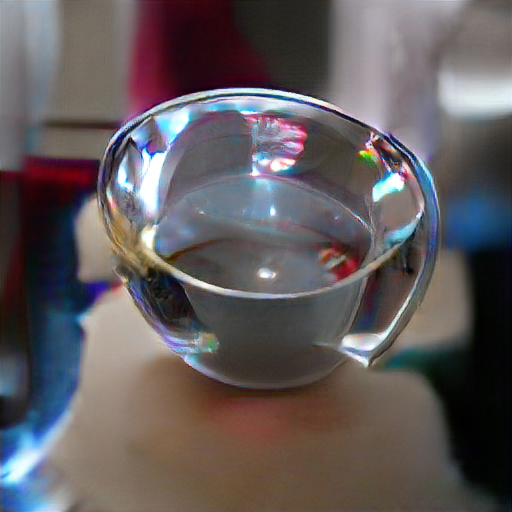

In [45]:
#show file 
Image('output_0.png')

# Katinka

In [18]:
## NOT NECESSARY FOR CROSSBREED
# testing: vector without one_hot (from names or int)

# truncation originally 0.4
truncation = 0.4
#class_vectors = one_hot_from_names(['soap bubble'], batch_size=1)
#class_vectors = (one_hot_from_names(['soap bubble'], batch_size=1) + one_hot_from_names(['coffee'], batch_size=1))/2
#class_vectors = (one_hot_from_names(['clock'], batch_size=1) + one_hot_from_names(['woollen'], batch_size=1))/2
#class_vectors = (one_hot_from_names(['lipstick'], batch_size=1) + one_hot_from_names(['perfume'], batch_size=1))/2
#num = 1/1000
class_vectors = np.full((1,1000), 1/1000)
#class_vectors = one_hot_from_int(listje, batch_size=1)
noise_vectors = truncated_noise_sample(truncation=truncation, batch_size=1)
# print(class_vectors)
# print(noise_vectors)

# All in tensors
noise_vectors = torch.from_numpy(noise_vectors)
class_vectors = torch.from_numpy(class_vectors)

# Save childs vectors
child_noise = noise_vectors[0]
child_class = class_vectors[0]

# If you have a GPU, put everything on cuda
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
noise_vector = noise_vector.to(device)
class_vector = class_vector.to(device)
model.to(device)

# Generate an image
with torch.no_grad():
    output = model(noise_vectors, class_vectors, truncation=truncation)

# Save results as png images
save_as_images(output)

RuntimeError: ignored

In [19]:
# NOT NECESSARY FOR CROSSBREED
# morph images

# truncation originally 0.4
truncation = 0.4
#class_vectors = one_hot_from_names(['soap bubble'], batch_size=1)
#class_vectors = (one_hot_from_names(['soap bubble'], batch_size=1) + one_hot_from_names(['coffee'], batch_size=1))/2
#class_vectors = (one_hot_from_names(['clock'], batch_size=1) + one_hot_from_names(['woollen'], batch_size=1))/2
#class_vectors = (one_hot_from_names(['lipstick'], batch_size=1) + one_hot_from_names(['perfume'], batch_size=1))/2
class_vectors = (one_hot_from_names(['white shark'], batch_size=1) + one_hot_from_names(['goldfish'], batch_size=1))/2
noise_vectors = truncated_noise_sample(truncation=truncation, batch_size=1)

# All in tensors
noise_vectors = torch.from_numpy(noise_vectors)
class_vectors = torch.from_numpy(class_vectors)

# Save childs vectors
child_noise = noise_vectors[0]
child_class = class_vectors[0]

# Generate an image
with torch.no_grad():
    output = model(noise_vectors, class_vectors, truncation)

# Save results as png images
save_as_images(output)

RuntimeError: ignored

In [20]:
# RUN BEFORE EVERY CYCLE STARTED (regenerate initial position every time)
# initial position (first child and mating parents)

# timer execution time
t1_start = time.perf_counter()
t2_start = time.process_time()

# Prepare 1 main parent and 3 potential mating parents
# truncation originally 0.4
truncation = 0.4
child_vector = (one_hot_from_names(['soap bubble'], batch_size=1) + one_hot_from_names(['coffee'], batch_size=1))/2
#print(child_vector)
parent_vectors = one_hot_from_names(['mushroom','clock','skunk'], batch_size=3)
class_vectors = np.append(child_vector, parent_vectors, axis=0)
#class_vector = (one_hot_from_names(['soap bubble'], batch_size=1) + one_hot_from_names(['coffee'], batch_size=1))/2
#class_vector = one_hot_from_names(['soap bubble','coffee'], batch_size=2)/2
noise_vectors = truncated_noise_sample(truncation=truncation, batch_size=4)

# All in tensors
noise_vectors = torch.from_numpy(noise_vectors)
class_vectors = torch.from_numpy(class_vectors)
# print(type(class_vectors))
# print(type(noise_vectors))
# print(class_vectors)
# print(noise_vectors)

# If you have a GPU, put everything on cuda
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
noise_vector = noise_vector.to(device)
class_vector = class_vector.to(device)
model.to(device)

# Generate an image
with torch.no_grad():
    output = model(noise_vectors, class_vectors, truncation)

# If you have a GPU put back on CPU
# output = output.to('cpu')

# If you have a sixtel compatible terminal you can display the images in the terminal
# (see https://github.com/saitoha/libsixel for details)
#display_in_terminal(output)

# Save results as png images
save_as_images(output)

# return execution time (https://www.programcreek.com/python/example/82530/time.perf_counter)
t1_stop = time.perf_counter()
t2_stop = time.process_time()
print("--------------------------------------------------")
print("Elapsed time: %.1f [seconds]" % (t1_stop-t1_start))
print("CPU process time: %.1f [seconds]" % (t2_stop-t2_start))
print("--------------------------------------------------") 

RuntimeError: ignored

In [0]:
#move image
mv output_0.png images/

In [33]:
ls

cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb  pytorch-pretrained-BigGAN/
images/                                             sample_data/
output_0.png


### Store files in directory

In [0]:
mkdir images

# Create Moving Images

In [0]:

image_folder = '/content/InterFaceGAN/results/%s' %latent_direction
video_fps = 12.

# NOG NIET NAAR GEKEKEN

In [0]:
# AT START OF PROGRAM (if necessary for tensorflow stuff)
#tf.enable_eager_execution() 

In [0]:
# looping evolution process
# output_0 = child/main parent, output_1-3 = mating parent options

while True:
    inp = 0
    while not inp in ["1","2","3","s"]:
        inp = input("Mate with picture [1,2,3] ")
    if inp == "s":
        break

    #child_vector = (class_vectors[0] + class_vectors[int(inp)])/2
    print(class_vectors[0])
    child_vector = (class_vectors[0] + class_vectors[int(inp)])/2
    
#     sess = tf.Session()
#     with sess.as_default():
#         numpy_array = child_vector.eval()
#         print(numpy_array)
    
    print(child_vector)
#     print(class_vectors)
#     print(class_vectors[0])
#     print(class_vectors[int(inp)])
#     print(child_vector)
    parent_vectors = one_hot_from_names(['cock','clock','woollen'], batch_size=3)
    print(parent_vectors)
    #class_vector = np.append(child_vector, parent_vectors, axis=0)
    noise_vectors = truncated_noise_sample(truncation=truncation, batch_size=1)

    # All in tensors
    noise_vectors = torch.from_numpy(noise_vectors)
    tensor_parents = torch.from_numpy(parent_vectors)
    print(tensor_parents)
    class_vector = torch.cat((child_vector, tensor_parents), dim=0)

    # Generate an image
    with torch.no_grad():
        output = model(noise_vectors, class_vector, truncation)

    # Save results as png images
    save_as_images(output)

KeyboardInterrupt: ignored